In [1]:
# Import all of modules we will need

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Each array of logitude and latitude will have variables assigned to them.

In [3]:
# we will generate the numbers, assign a variable, and combine them into sets using the (zip) function

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
   # print(coordinate[0], coordinate[1])

In [7]:
# Import citipy module

from citipy import citipy

In [8]:
#Create a list for holding the cities.

cities = []

#Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    
    if city not in cities:
        
        cities.append(city)
        
#Print the city count to confirm sufficient count

len(cities)

637

In [9]:
#Import the time library and the dateime mdoule from the datiem library
from citipy import citipy

import time

from datetime import datetime


In [10]:
#Import the requests library.

import requests

#Import the API key.

from config import weather_api_key

In [11]:
# Starting URL for the Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
#Create an empty list to hold the weather data

city_data = []

#Print the beginning of the logging

print("Beginning Data Retrieval     ")

print("-----------------------------")

#Create counters

record_count = 1

set_count = 1

#Loop through all the cities in our list

for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    #Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 toS the record count
    
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        
        #Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        
        city_lat = city_weather['coord']['lat']
        
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        #Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        
        city_data.append({'City': city.title(),
                          
                          'Lat': city_lat, 
                          
                          'Lng': city_lng, 
                          
                          'Max Temp': city_max_temp, 
                          
                          'Humidity': city_humidity, 
                          
                          'Cloudiness': city_clouds, 
                          
                          'Wind Speed': city_wind, 
                          
                          'Country': city_country, 
                          
                          'Date': city_date})
        
#If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        
        pass

#Indicate that the Data Loading is complete

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")


    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.                                    
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | macklin
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | callaguip
Processing Record 7 of Set 1 | ocampo
Processing Record 8 of Set 1 | lakes entrance
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | sinnamary
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | badvel
Processing Record 17 of Set 1 | makakilo city
Processing Record 18 of Set 1 | gander
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | hambantota
Processing Record 22 of

Processing Record 39 of Set 4 | baykit
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | salinopolis
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | severnyy
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 4 | ibra
Processing Record 47 of Set 4 | nizhniy tsasuchey
Processing Record 48 of Set 4 | nestorion
City not found. Skipping...
Processing Record 49 of Set 4 | manggar
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | gao
Processing Record 4 of Set 5 | saint-georges
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | cabra
Processing Record 8 of Set 5 | arys
Processing Record 9 of Set 5 | portadown
Processing Record 10 of Set 5 | cayenne
Processing Record 11 of Set 5 | dickinson
Pr

Processing Record 31 of Set 8 | ipua
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 34 of Set 8 | lompoc
Processing Record 35 of Set 8 | naron
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | cuamba
Processing Record 38 of Set 8 | medina
Processing Record 39 of Set 8 | truth or consequences
Processing Record 40 of Set 8 | villarrica
Processing Record 41 of Set 8 | mandiana
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | katobu
Processing Record 44 of Set 8 | hollola
Processing Record 45 of Set 8 | abha
Processing Record 46 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 47 of Set 8 | uwayl
City not found. Skipping...
Processing Record 48 of Set 8 | lasa
Processing Record 49 of Set 8 | mahibadhoo
Processing Record 50 of Set 8 | muyezerskiy
Processing Record 1 of Set 9 | deputatskiy
Processing Record 2 of Set 9 | dongsheng
Processing Reco

Processing Record 19 of Set 12 | nepomuk
Processing Record 20 of Set 12 | tinglev
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | concepcion del uruguay
Processing Record 23 of Set 12 | kollam
Processing Record 24 of Set 12 | portland
Processing Record 25 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 26 of Set 12 | bontang
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | roma
Processing Record 29 of Set 12 | inongo
Processing Record 30 of Set 12 | half moon bay
Processing Record 31 of Set 12 | taft
Processing Record 32 of Set 12 | fortuna
Processing Record 33 of Set 12 | rampura
Processing Record 34 of Set 12 | plainview
Processing Record 35 of Set 12 | chalus
Processing Record 36 of Set 12 | benoy
Processing Record 37 of Set 12 | sakaiminato
Processing Record 38 of Set 12 | coahuayana
Processing Record 39 of Set 12 | ormara
Processing Record 40 of Set 12 | avila
Processing Record 41 of Set 12 | sept-

In [13]:
len(cities)

637

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,47.80,69,68,13.27,NZ,2022-07-14 02:37:45
1,Khatanga,71.9667,102.5000,46.45,74,100,10.54,RU,2022-07-14 02:33:50
2,Macklin,52.3334,-109.9348,71.94,80,98,21.00,CA,2022-07-14 02:37:45
3,Bethel,41.3712,-73.4140,75.76,77,87,1.01,US,2022-07-14 02:37:46
4,Callaguip,18.0714,120.4867,87.82,74,20,10.36,PH,2022-07-14 02:37:46
5,Ocampo,21.6500,-101.5000,62.29,63,59,18.81,MX,2022-07-14 02:37:47
6,Lakes Entrance,-37.8811,147.9810,54.16,66,100,10.85,AU,2022-07-14 02:37:47
7,Hobart,-42.8794,147.3294,53.26,73,75,12.66,AU,2022-07-14 02:36:50
8,Chokurdakh,70.6333,147.9167,57.20,39,4,10.38,RU,2022-07-14 02:37:48
9,Sinnamary,5.3833,-52.9500,75.74,90,100,4.16,GF,2022-07-14 02:37:48


In [15]:
#Reorder columns by creating a new variable with the desired column order then adding that variable to the DF Variable

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-14 02:37:45,-46.6000,168.3333,47.80,69,68,13.27
1,Khatanga,RU,2022-07-14 02:33:50,71.9667,102.5000,46.45,74,100,10.54
2,Macklin,CA,2022-07-14 02:37:45,52.3334,-109.9348,71.94,80,98,21.00
3,Bethel,US,2022-07-14 02:37:46,41.3712,-73.4140,75.76,77,87,1.01
4,Callaguip,PH,2022-07-14 02:37:46,18.0714,120.4867,87.82,74,20,10.36
5,Ocampo,MX,2022-07-14 02:37:47,21.6500,-101.5000,62.29,63,59,18.81
6,Lakes Entrance,AU,2022-07-14 02:37:47,-37.8811,147.9810,54.16,66,100,10.85
7,Hobart,AU,2022-07-14 02:36:50,-42.8794,147.3294,53.26,73,75,12.66
8,Chokurdakh,RU,2022-07-14 02:37:48,70.6333,147.9167,57.20,39,4,10.38
9,Sinnamary,GF,2022-07-14 02:37:48,5.3833,-52.9500,75.74,90,100,4.16


In [16]:
#Create the ouput file (CSV).

output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]



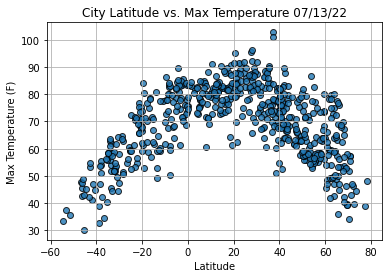

In [20]:
# Import the time module. This is different from when we used "datetime" module.  The time module is a standard Python 
# library so we don't need to install it.

import time

#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           
            max_temps,
           
           edgecolor="black", linewidths=1, marker="o",
           
           alpha=0.8, label="Cities")

#Incorporate the other graph properties. Using "strftime" to format the date time into a more regular format.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

#Save the Figure.

plt.savefig("weather_data/Fig1.png")

#show plot.

plt.show()

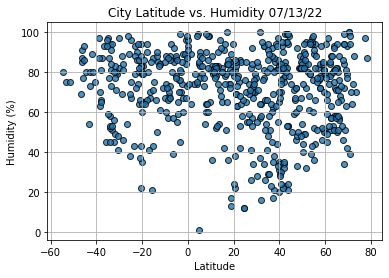

In [21]:
#Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
           humidity,
            
           edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")
           
    
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

#Show plot.

plt.show()

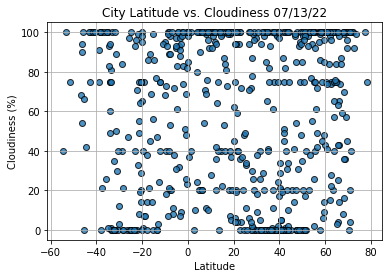

In [22]:
#Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
           cloudiness,
            
           edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")
           
    
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

#Show plot.

plt.show()

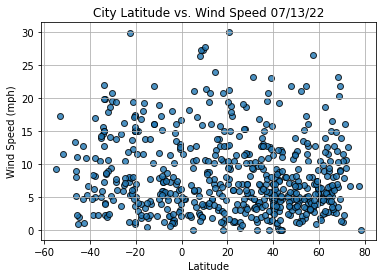

In [23]:
#Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
           wind_speed,
            
           edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")
           
    
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

#Show plot.

plt.show()